# INITIAL DATA EXPLORATION

This is the first Notebook for this project, and this notebook is going to be utlized to understand the raw Amazon dataset downloaded from Kaggle: https://bit.ly/2Rzvjqf . Here, the dataset was studied, disected and the attributes needed for the next step was analyzed accoridngly.

## SUMMARY

The initial dataset downloaded from Kaggle had 32 columns, where it had more than enough information. Upon further analysis, the information within the dataset was focused more on the (1) product and (2) the reviews and not so much on the reviewer themselves, and hence it was subsequently concluded that this project will take the lingusitics approach to the fake review detection problem, and not behavioral. 

The 30 other columns within this dataset, although a bit excessive for the purpose of this project, aided us in understanding the background of the reviews and the products in details, and thus was able to provide us with rich context, which we can refer to when we are analyzing our results down the project. Therefore, before dropping the 30 columns, graphs and analysis were made throughout the Notebook.

At the end of the notebook, the columns were dropped, and the only columns kept were review_text and verified_purchase, where they were saved inside a csv file, so we can conduct the EDA and Data Pre-processing on the textual data present. 

> What is conducted in this notebook?
1. Shape of the dataset is studied, and the columns are seen in details. 
2. Data description and Summary Statistics
3. Normalization of data to support EDA analysis
4. Checking for NULL and Duplicates
5. EDA 
6. Dropping of columns which are not necessary for model building
7. Saving final dataframe to csv.

----------------------------------------------------------------------

## INITIALIZATION

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [4]:
#lOADING DATASET 
df = pd.read_csv("Book_1_50.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## SHAPE OF THE DATA AND ITS ATTRIBUTES

In [5]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  43148
Total Attributes:  12


> There are in total of 2.5k reviews within this dataset, which makes it to be a valid dataset since the records are more than 1k, thus suitable for analysis.

> However, it is to be noted that there are in total of 32 columns within this dataset, which is far more than what is required for this project. These columns need to be taken a deeper look for feature selection.

In [6]:
#INFORMATION ON THE LOADED CSV FILE. COVERS COLUMN NAMES, TOTAL ROWS AND COLUMS, DATA TYPES AND THE MEMORY USAGE.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43148 entries, 0 to 43147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         43148 non-null  float64
 1   verified        43148 non-null  bool   
 2   reviewTime      43148 non-null  object 
 3   reviewerID      43148 non-null  object 
 4   asin            43148 non-null  object 
 5   style           42990 non-null  object 
 6   reviewerName    43141 non-null  object 
 7   reviewText      43131 non-null  object 
 8   summary         43136 non-null  object 
 9   unixReviewTime  43148 non-null  int64  
 10  vote            2992 non-null   object 
 11  image           120 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 3.7+ MB


### AT FIRST GLANCE

> Most of the attributes in the dataset happens to be of string/object. Since we are going to be reviewing the reviews itself, it is important to note that we have to consider the ones that are needed in regards to the FYP objectives.

> To see whether we can go in the direction of behavioral or textual features, the columns should be inspected in depth. 

> There is a lack of integer values (10 WHEN FLOAT IS COUNTED)  in the dataset, and hence we will not be focusing on numerical features. Need to be seen in further context for more clarification.

> there are 21 strings, and hence word cloud and other things can be seen in more depths to study its relationships with one another.

> the null values should be taken further look. from first glance, it can be seen that matched_keywords, time_of_publicationm nabyfacturer's response, dimensions 4 - 6, have no value to them. Overall, there seem to be some missing values, which needs to be dealth with


In [7]:
#DISPLAY DATAFRAME
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"04 5, 2018",A3OFV8AGCZBR4Q,0061900621,{'Format:': ' Hardcover'},Marko Petrovic,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400,NaN,NaN
1,5.0,True,"03 20, 2018",AFRZEPUFQ5MMC,0061900621,{'Format:': ' Hardcover'},Mr. Frank,daughter like it,Five Stars,1521504000,NaN,NaN
2,5.0,True,"03 7, 2018",A1S1CPDH3FQJGW,0061900621,{'Format:': ' Hardcover'},TMH21,I gave this book to a two and a half year old ...,A great gift.,1520380800,NaN,NaN
3,5.0,True,"02 6, 2018",AV4H0HWXRJN7C,0061900621,{'Format:': ' Hardcover'},Sara,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200,NaN,NaN
4,5.0,True,"01 25, 2018",AGQHMKOP1I3DL,0061900621,{'Format:': ' Paperback'},Nancy Blaskewicz,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400,NaN,NaN


## DATA DESCRIPTION


> We can gain a better grasp of the dataset by digging deeper into the columns. The columns are described in detail below.

1. report_date: when the data was extracted initially. From a quick glance, most were collected from the year 2019.
2. online_store: The name of the store in which these reviews have been placed.
3. upc: The Universal Product Code (UPC) is a barcode symbology that is commonly used to monitor trade products in retailers across the world. Each trade item is issued a unique UPC, which is made up of 12 numeric digits.
4. retailer_product_code:  Product identifier from the retailer's side.
5. brand: The brand of the product being sold.
6. category: the general category of the product e.g foods
7. sub_category: the category which describes the category the product is under: category= food, sub-category=savoury
8. product_description: description of the product in detail to provide more clarity on the product
9. review_date: date when the review is posted.
10. review_rating: rating given by the reviewer on the product. Determines the overall score of the review itself, given to the product supposedly purchased. Scale is from 1 - 5, 1 being very poor and 5 being excellent.
11. review_title: title given to the review written.
12. review_text: the actual review itself, explaining the product supposedly bought by the customer
13. is_competitor: whether the prodcut is a competitor or not. Futher analysis should be conducted to understand this column further.
14. manufacturer: the manufacturer of the product.
15. market: where these products and stores are situated. To understand this further, needs to be taken deeper look. 
16. matched_keywords: from the dataset, this cannot be derived, since all of the values within this column appears to be NULL. 
17. time_of_publication: from the dataset, this cannot be derived, since all of the values within this column appears to be NULL. 
18. url: url of the review itself.
19. review_type: indicates the review type. research for more information
20. parent_review: indicates whether the review is parent or a child.
21. manufacturers_response:
22. dimension 1 - 8: miscellenous information on the product itself. There are several missing values within these columns, which will be verified later on.
23. verified_purchase: whether the reviews written has been verified or not by Amazon's system.
24. helpful_review_count: how many indivudual have found the review to be helpful
25. review_hash_id: unique identifier of the review.

## SUMMARY STATISTICS 

> useful to understand the average values acorss the dataset, and make useful insights regarding its conents. For numerical values, it can aid us in understanding what the max/min values are, and understand the mean values, whilst subsequently understanding if there are any NULL values across the board. 

> As for the objects, it can aid us in identifying the unique values within the dataset, and how many instances a certain word or character within the columns.

In [8]:
#NON-OBJECTS
df.describe()

,overall,unixReviewTime
count,43148.000000,4.314800e+04
mean,4.681074,1.403766e+09
std,0.754929,1.082660e+08
min,1.000000,8.931168e+08
25%,5.000000,1.394323e+09
50%,5.000000,1.423440e+09
75%,5.000000,1.462147e+09
max,5.000000,1.525738e+09


1. the average review within this dataset happen to be positive, which can be seen from the high rating of 4.4. The min rating is 1 and the max is 5, 1 being very poor and 5 being excellent. 
2. most of the reviews within this dataset has not had a helpful review count given to them, which can be seen from the low average of 0.2. 
3. UPC is a unique identifier, and hence will be ignored in this summary stats
4. is_competitor column displays that there happens to be no values indicating that there is anything flagged as a competitor. This can be confirmed by both the min and max values being 0, and hence the average value being 0.
5. matched_keywords,	time_of_publication,	manufacturers_response,	dimension4,	dimension5,	dimension6 all have NULL values entirely.

In [9]:
#OBJECTS
df.describe(include=object)

,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,vote,image
count,43148,43148,43148,42990,43141,43131,43136,2992,120
unique,4471,35741,50,16,29037,39737,24640,122,120
top,"06 23, 2003",A2XCLJRGFANRC,0439023521,{'Format:': ' Kindle Edition'},Amazon Customer,Great,Five Stars,2,['https://images-na.ssl-images-amazon.com/imag...
freq,97,12,11557,16190,2288,133,8407,1147,1



1. there are in total of 9 stores present in the dataset, most of which are from AMAZON store itself. Most of the stores present happen to be major outlet stores within the UK.
2. most of the data happens to come from the category of Personal Care, under the Laundry section of the brand Comfort. 
3. the reviews where there are mostly positive values can be seen to have "Good" in the review_text and "great value" written in it, indicating that within the positive reviews have similar wording in them. can be confirmed the more we look into it. 
4. throught the dataset, there happened to me one manufacturer - Unilever Global
5. market happen to only be in UK.
6. There are two types of reviews, most of them being organic and parent reviews.
7. dimensions 1 - 8 displays extra information on the product itself, as confirmed. most of them happen to be laundry products.
8. review_hash_id: this can be ignored since it is a unique identifier.

In [11]:
df["verified"].value_counts(normalize=True).to_frame()

,verified
True,0.696487
False,0.303513


Most of the reviews happen to be organic (77%) and the syndicated reviews, which are reffered to reviews of the same product which were shared accorss multiple platforms for higher accessibility, is the minimum (22%).

In [13]:
#df["parent_review"].value_counts(normalize=True).to_frame()

Most of the reviews are said to be parent reviews. Upon further research, it is unclear what this stands for, and hence might be dropped due to is ambiguity.

In [16]:
df["reviewTime"].value_counts().to_frame()

,reviewTime
"06 23, 2003",97
"06 22, 2003",94
"10 1, 2014",80
"01 4, 2015",76
"06 24, 2003",74
"12 29, 2014",74
"01 28, 2014",73
"02 20, 2015",69
"01 3, 2015",64
"12 30, 2014",61


In [18]:
#df["report_date"].value_counts().to_frame()

The years of the reviews  on this dataset consists of 2019 only.

In [22]:
df.groupby('overall')['reviewTime'].value_counts().sort_index(ascending=True).to_frame()

reviewTime
overall reviewTime             
1.0     01 1, 2016            1
        01 1, 2017            1
        01 10, 2016           1
        01 10, 2017           1
        01 11, 2017           1
        01 12, 2006           1
        01 12, 2010           1
        01 12, 2012           1
        01 13, 2013           1
        01 13, 2017           1
        01 14, 2005           1
        01 14, 2016           1
        01 15, 2006           1
        01 15, 2010           1
        01 15, 2014           1
        01 15, 2016           1
        01 16, 2015           3
        01 16, 2018           1
        01 17, 2015           1
        01 17, 2016           1
        01 17, 2017           2
        01 18, 2015           1
        01 18, 2018           1
        01 19, 2018           1
        01 2, 2006            1
        01 20, 2012           1
        01 20, 2013           1
        01 20, 2015           2
        01 20, 2016           2
        01 21, 2007           1
        01 21, 2014           1
        01 22, 2013           1
        01 24, 2015           1
        01 24, 2017           1
        01 25, 2015           3
        01 25, 2016           1
        01 26, 2014           1
        01 27, 2009           1
        01 27, 2015           1
        01 28, 2015           1
        01 28, 2016           1
        01 28, 2017           1
        01 28, 2018           1
        01 29, 2017           1
        01 29, 2018           2
        01 31, 2015           1
        01 31, 2016           1
        01 31, 2018           1
        01 4, 2006            1
        01 4, 2009            1
        01 5, 2004            1
        01 5, 2015            1
        01 5, 2016            1
        01 5, 2018            1
        01 7, 2016            1
        01 9, 2013            1
        01 9, 2018            2
        02 1, 2016            2
        02 10, 2006           1
        02 10, 2014           1
        02 10, 2015           1
        02 10, 2018           1
        02 11, 2015           1
        02 12, 2014           1
        02 12, 2018           1
        02 13, 2016           1
        02 14, 2014           3
        02 16, 2015           1
        02 17, 2016           1
        02 18, 2014           2
        02 18, 2016           1
        02 18, 2017           2
        02 19, 2015           1
        02 2, 2014            1
        02 20, 2015           1
        02 20, 2017           1
        02 21, 2013           1
        02 21, 2014           1
        02 21, 2018           2
        02 22, 2014           1
        02 22, 2018           2
        02 23, 2016           1
        02 23, 2018           1
        02 24, 2014           1
        02 25, 2011           1
        02 26, 2013           1
        02 28, 2014           1
        02 28, 2016           1
        02 3, 2016            3
        02 4, 2005            1
        02 4, 2015            1
        02 5, 2005            1
        02 5, 2014            1
        02 7, 2010            1
        02 7, 2015            1
        02 8, 2016            1
        02 9, 2014            2
        03 1, 2015            2
        03 1, 2016            1
        03 10, 2017           1
        03 10, 2018           1
        03 11, 2014           1
        03 12, 2014           1
        03 13, 2014           2
        03 14, 2012           1
        03 14, 2017           1
        03 15, 2015           2
        03 15, 2018           1
        03 16, 2015           1
        03 17, 2012           1
        03 18, 2014           1
        03 18, 2016           2
        03 19, 2015           1
        03 2, 2004            1
        03 2, 2015            1
        03 20, 2014           1
        03 20, 2018           1
        03 21, 2014           1
        03 21, 2015           1
        03 21, 2017           1
        03 22, 2014           2
        03 25, 2014           1
        03 25, 2016           1
        03 26, 2016  

The sub-categories, grouped by the categories accordingly. 

Upon closer inspection, there are multiple categories which are overlapping or indicate that they mean the same thing, but are written in differently e.g Hair and Hair care, Deos and Deodorants & Fragrances, or having same sub_categories but different categories e.g Ice Cream under Refreshment and Foods.

needs to be handled since this can be useful for further EDA analysis

In [59]:
#CHANGING THE CATEGORIES AND SUB-CATEGORIES
#df.loc[df.overall == "5.0", df.verified == "True"] = "5.0_true"

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

In [31]:
#df.loc[df.sub_category == "HHC", "sub_category"] = "Household Care"

In [32]:
#df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"

In [33]:
#df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"

In [34]:
#df.loc[(df['sub_category'] == "Hair Care") & (df['category'] == "Personal Care")]
#df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"

In [35]:
#df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

Everything is now sorted and hence can be used for EDA analysis accordingly.

In [38]:
df["verified"].value_counts().to_frame()

,verified
True,30052
False,13096


Most comes from AMAZON store, and most of them are stores from the UK.

The majority of the reviews have not been awarded with a helpful review, and if there have been it has been extremely low. Hence, this may skew the results of the reviews itself, and thus would not be helpful in identifying the fake reviews of this dataset

## CHECKING FOR NULL AND DUPLICATED VALUES

In [39]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
df.isnull().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style               158
reviewerName          7
reviewText           17
summary              12
unixReviewTime        0
vote              40156
image             43028
true              43148
dtype: int64

Just as mentioned previously, there are NULL values within this dataset which needs to be taken care of. 

1. review_title has 98 NULL values, which is the minority considering there are over 2k records. 
2. URL has 800+ missing values, which can be ignored since this is not significant to the nature of our project
3. matched_keywords, time_of_publication, manufacturers_response, dimension4, dimension5, dimension6 don't have any values in them, and hence will most definately be dropped. 
4. dimension 7 has 2 missing values, and from above it can be seen that it contains just an extra info on the product.

**There are no NULL values for review_rating, review_text, and verified_purchase, which are the main attributes needed for the analysis.**

In [40]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  465


There are no duplicated records within this dataset, therefore this step will be skipped.

### VERDICT SO FAR...

>There is a lack of behavioral attributes in relation to the reviews itself. There is no information regarding the author, the time of the review written, the collection of the reviews written by the same author, and hence behavioral context cannot be utlized to determine the fake reviews of this project. 
 

### TEXTUAL ATTRIBUTES

In [42]:
#TEXTUAL ATTRIBUTES
cols = ['overall','verified', 'reviewTime','reviewerID','asin','reviewText','summary','unixReviewTime']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
0,4.0,True,"04 5, 2018",A3OFV8AGCZBR4Q,0061900621,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400
1,5.0,True,"03 20, 2018",AFRZEPUFQ5MMC,0061900621,daughter like it,Five Stars,1521504000
2,5.0,True,"03 7, 2018",A1S1CPDH3FQJGW,0061900621,I gave this book to a two and a half year old ...,A great gift.,1520380800
3,5.0,True,"02 6, 2018",AV4H0HWXRJN7C,0061900621,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200
4,5.0,True,"01 25, 2018",AGQHMKOP1I3DL,0061900621,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400



>There are textual attributes available within this dataset, and on top of that there are no NULL values within them as displayed above, and hence textual attributes can be used to understand the textual context of these reviews, so by the time we are building the classifier, we have a better undersranding on the review data itself. 

> essentially the textual attributes can aid us in approaching the problem in a linguistic features fashion, where The linguistic feature considers review text to identifythe reviews as fake vs truth

>the attributes above will be used to further our understanding in our EDA process.

### OTHER ATTRIBUTES

In [44]:
#DIMENSIONS 1 - 8
#cols = ['dimension1', 'dimension2','dimension3','dimension4','dimension5', 'dimension6','dimension7','dimension8']
#dimensions = df[cols]
#pd.DataFrame(dimensions).head()

>The rest of the attributes are considered to be extra information, which has aided us in understanding the background information on the reviews and the products itself. For instance, dimensions 1 - 8 were extra information on the product itself, and although it aided us in understanding the context of the product, it would not be helpful in identifying the fake reviews from the truth reviews.

## EXPLORATORY DATA ANALYSIS 

In [45]:
#SETTING SEABORN STYLE
sns.set_style('darkgrid')

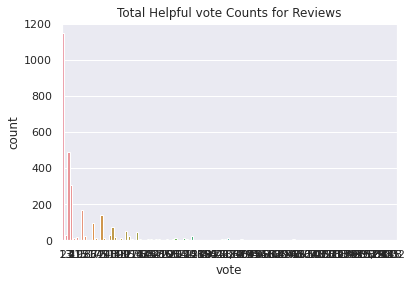

<Figure size 1440x1080 with 0 Axes>

In [55]:
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
df.fillna('0')
sns.countplot(x ='vote', 
              data = df).set_title("Total Helpful vote Counts for Reviews")
plt.figure(figsize=(20,15))
plt.show()
#TODO classification with rate number.

In normal basis, helpful_review_count can aid us in understanding which reviews has helped users in purchases a product. However for this dataset, it can be observed that most of the reviews have 0 helpful review count, and others having a miniscule amount of helpdul reviews given. In this case, this will actually skew our understanding in identifying which reviews are fake and which ones are real, and therefore to eliminate bias, this column will not be considered for our model building.

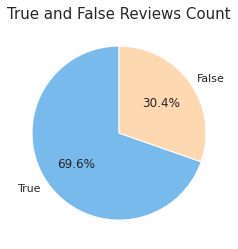

In [56]:
#PIE CHART ON VERFIED PURCHASES - check one
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Verified_purchases column is the target variable for this project. From the countplot above, it can be seen that there are near equal parts of true VP and false VP (56% and 44% respectively). 

Amazon has provided their solution to combat fake reviews by implementing this column, Verified Purchases, where the reviewer has to go through a series of verification steps to ensure that the review that they are placing has indeed been bought from the site. This is Amazon's answer to combating fake reviews, and thus provides security on the truthfulness of the reviews since the review has been placed after purchasing the products. 


Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

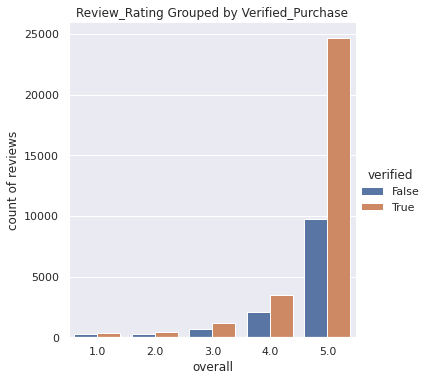

In [60]:
#COUNTPLOT OF REVIEW RATING GROUPED BY VERIFIED PURCHASE
sns.catplot(x ='overall',kind="count", hue="verified",
            data=df)
plt.xlabel("overall")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

According to previous literature, fake reviews refer to reviews that demote/promote a product without any necessary experience with the said service/product. 

Referring to the graph, it can be observed that False VP has the higest amount of 5 rating compared to its 1 rating, indicating that the fake reviews has been used to promote the product without the purchase. This is usually done to boost the ratings up of the product. It can also be observed that the True Vp has the highest 5 rating compared to the False. 

When we take a look at the 1 star rating, the False VP happen to be more than the True VP, which can indicate that the reviews were trying to demote the said product, again without previous purchase. 

Overall, it can be seen that majority of the ratings within this dataset to be positive, and hence should be kept in mind whilst proceeding with the model building.

Looking further into the categories, we can see that the sub-categories with more unverified reviews are under skin care, skin cleansing, personal care and dressings. Most of them are under the Personal care category, with exception to dressings, which falls under the Foods section. 

fake reviews on beauty products:
https://www.dazeddigital.com/beauty/head/article/48461/1/fake-beauty-brand-reviews-sunday-riley-kylie-skin-estee-laundry
https://medium.com/swlh/crossing-a-minefield-of-fake-beauty-product-reviews-34af00399668
https://edition.cnn.com/2019/10/22/us/sunday-riley-fake-reviews-trnd/index.html
https://www.allure.com/story/trust-online-beauty-product-reviews-truth
https://www.glamour.com/story/fake-online-beauty-reviews

Laundry happens to be the place with the most number of purchases and the highest number of verified purchases, which adds up to the graph above where this sub-cateogory falls under the Home care category.

### REVIEW TEXT EDA

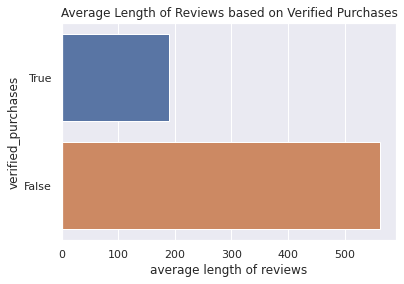

In [65]:
cols = ["verified", "reviewText"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["reviewText"].fillna('').apply(len).mean()
true_average_length = filtered_true["reviewText"].fillna('').apply(len).mean()
#PLOTTING THE GRAPH
x = [true_average_length,false_average_length]
y = ["True", "False"]
sns.barplot(x, y)
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

One of the key takeaways from this graph is the fact that the average length of the false values happened to exceed the ones which are flagged as verified. This can be backed up by several posts, noteably a site which specilizes in catching fraudulent reviews, where it was mentioned that the average length of these reviews tend to exceed the normal length compared to legitimate reviews. 

We can see here that the average length of the false VP happen to be more than 250 characters, whilst the true VP happens to be around 50 - 100 characters.

## ATTRIBUTES/COLUMNS TO DROP

>Now that we are done using the other attributes to further our understanding of the dataset, it is time to consider what is needed for our model building. As mentioned, we are taking the linguistics approach to identifying fraudulent reviews from one another, and hence we are going to keep soly the reviews associated directly with the nature of the reviews: ``review_text, review_date, review_rating, review_title and the verified_purchase columns``.

>This is done due to us trying to extract the features from the review_text, and verified_purchases will aid us in identifying which one is the ground false value which can be used to train the classifier. The other review-related columns are going to further aid us in our data pre-processing in the next stage, where we will focus more on the review_text itself and not the other attributes. 


1. **matched_keywords, time_of_publication, manufacturers_response, dimension4, dimension5, dimension6** contain nothing but NULL values, hence should be droppped.

2. **is_competitor and helpful_review_count** have very minimal to zero values within them as displayed in the summary statistics, and hence would not aid us in understanding the dataset or model building, and hence should be dropped.

3. **report_date,	online_store,brand,	category,	sub_category, market** columns has aided us in understanding the context of the data and its origin, however will not further aid us in model building.

4. **upc, retailer_product_code, review_hash_id, url** are unique identifiers, and hence will not aid us in model building.

5. **product_description, parent_review, review_type, manufacturer, dimension1, dimension2,	dimension3,	dimension4,	dimension5** columns are there as extra information on the product itself, and since we are not studying from a product's prespective, these information are renderred useless and will not aid us in our study. 

In [69]:
#DROP AFOREMENTIONED COLUMNS
df.drop(['reviewTime', 'style'
         ,'reviewerName'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,overall,verified,reviewerID,asin,reviewText,summary,unixReviewTime,vote,image,true
0,4.0,True,A3OFV8AGCZBR4Q,0061900621,My first born daughter loves this book and enj...,Big sissy loves this book,1522886400,NaN,NaN,NaN
1,5.0,True,AFRZEPUFQ5MMC,0061900621,daughter like it,Five Stars,1521504000,NaN,NaN,NaN
2,5.0,True,A1S1CPDH3FQJGW,0061900621,I gave this book to a two and a half year old ...,A great gift.,1520380800,NaN,NaN,NaN
3,5.0,True,AV4H0HWXRJN7C,0061900621,My daughter loves babies and telling her shes ...,Big sister hit.,1517875200,NaN,NaN,NaN
4,5.0,True,AGQHMKOP1I3DL,0061900621,This is the perfect book to give to a little g...,Good book when a new baby is expected.,1516838400,NaN,NaN,NaN


In [71]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('processedData.csv')